In [ ]:
# ----------------------------
# Batch-wise Fruit Detection (Large Dataset)
# ----------------------------

import cv2
import os
import numpy as np
import glob
import random
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ----------------------------
# Step 1: Feature Extraction Function
# ----------------------------
def extract_color_histogram(image_path):
    """
    Reads an image, resizes it, and returns a flattened color histogram.
    """
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0,256, 0,256, 0,256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# ----------------------------
# Step 2: Prepare Labels
# ----------------------------
dataset_path = 'fruits_dataset'  # <-- Replace with your dataset folder
classes = os.listdir(dataset_path)
label_encoder = LabelEncoder()
label_encoder.fit(classes)

# ----------------------------
# Step 3: Initialize Incremental Classifier
# ----------------------------
model = SGDClassifier(loss='hinge', max_iter=1000)

# ----------------------------
# Step 4: Batch-wise Training
# ----------------------------
batch_size = 500  # Adjust according to your RAM
image_paths = glob.glob(os.path.join(dataset_path, '*', '*'))
random.shuffle(image_paths)

print("Starting batch-wise training...")
for i in range(0, len(image_paths), batch_size):
    batch = image_paths[i:i+batch_size]
    X_batch = []
    y_batch = []
    for path in batch:
        label = path.split(os.sep)[-2]
        X_batch.append(extract_color_histogram(path))
        y_batch.append(label)
    X_batch = np.array(X_batch)
    y_batch = label_encoder.transform(y_batch)
    
    if i == 0:
        model.partial_fit(X_batch, y_batch, classes=np.arange(len(classes)))
    else:
        model.partial_fit(X_batch, y_batch)
    print(f"Processed batch {i//batch_size + 1}/{(len(image_paths)//batch_size)+1}")

print("Training completed.")

# ----------------------------
# Step 5: Test on a New Image
# ----------------------------
def predict_fruit(image_path):
    features = extract_color_histogram(image_path).reshape(1,-1)
    prediction_idx = model.predict(features)[0]
    prediction_label = label_encoder.inverse_transform([prediction_idx])[0]
    print(f"Detected Fruit: {prediction_label}")

# Example:
test_image = 'test/apple_test.jpg'  # <-- Replace with your test image
predict_fruit(test_image)


In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/331.8 MB 10.0 MB/s eta 0:00:33
    --------------------------------------- 6.0/331.8 MB 16.0 MB/s eta 0:00:21
   - -------------------------------------- 10.5/331.8 MB 17.7 MB/s eta 0:00:19
   - -------------------------------------- 14.2/331.8 MB 18.1 MB/s eta 0:00:18
   -- ------------------------------------- 18.4/331.8 MB 18.4 MB/s eta 0:00:18
   -- ------------------------------------- 22.5/331.8 MB 18.8 MB/s eta 0:00:17
   --- ------------------------------------ 26.7/331.8 MB 19.0 MB/s eta 0:00:17
   --- ------------------------------------ 30.9/331.8 MB 19.1 MB/s eta 0:00:16
   ---- ----------------------------------- 35.1/331.8 MB 19.2 MB/s eta 0:00:16
   ---- ----------------------------------- 38.5/331.8 MB 18.8 MB/s eta 0:00:16
   ----- ---------------------------------- 42.2/331.8 MB 18.8 MB/s eta 0:00:16
   ----- ---------------------------------- 46.4/33

In [8]:
model.save("final_fruit_model.keras")

Found 40000 files belonging to 100 classes.
Using 32000 files for training.
Found 40000 files belonging to 100 classes.
Using 8000 files for validation.
Detected Classes: ['abiu', 'acai', 'acerola', 'ackee', 'ambarella', 'apple', 'apricot', 'avocado', 'banana', 'barbadine', 'barberry', 'betel_nut', 'bitter_gourd', 'black_berry', 'black_mullberry', 'brazil_nut', 'camu_camu', 'cashew', 'cempedak', 'chenet', 'cherimoya', 'chico', 'chokeberry', 'cluster_fig', 'coconut', 'corn_kernel', 'cranberry', 'cupuacu', 'custard_apple', 'damson', 'dewberry', 'dragonfruit', 'durian', 'eggplant', 'elderberry', 'emblic', 'feijoa', 'fig', 'finger_lime', 'gooseberry', 'goumi', 'grape', 'grapefruit', 'greengage', 'grenadilla', 'guava', 'hard_kiwi', 'hawthorn', 'hog_plum', 'horned_melon', 'indian_strawberry', 'jaboticaba', 'jackfruit', 'jalapeno', 'jamaica_cherry', 'jambul', 'jocote', 'jujube', 'kaffir_lime', 'kumquat', 'lablab', 'langsat', 'longan', 'mabolo', 'malay_apple', 'mandarine', 'mango', 'mangosteen

200/200 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2891 - loss: 3.0743 - val_accuracy: 0.4775 - val_loss: 2.0762
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5331 - loss: 1.7512

200/200 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.5416 - loss: 1.7378 - val_accuracy: 0.5394 - val_loss: 1.7659
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6460 - loss: 1.3500

200/200 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.6375 - loss: 1.3646 - val_accuracy: 0.5631 - val_loss: 1.6388
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6875 - loss: 1.1526

200/200 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.6867 - loss: 1.1624 - val_accuracy: 0.5694 - val_loss: 1.5795
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7199 - loss: 1.0174

200/200 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.7166 - loss: 1.0272 - val_accuracy: 0.5925 - val_loss: 1.5231
Model training complete. Saved as final_fruit_model.keras


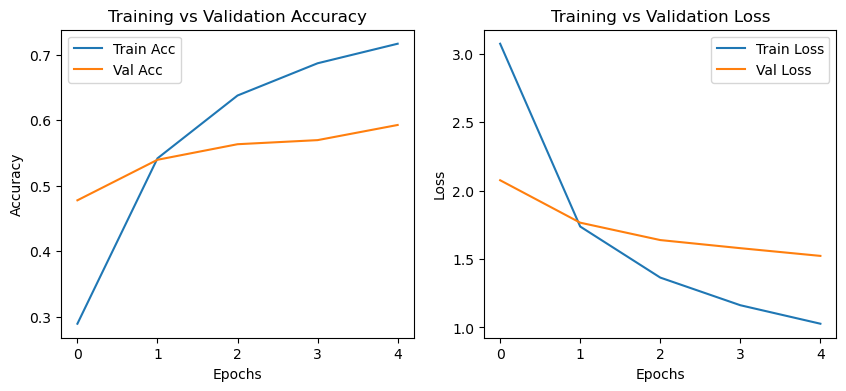

In [19]:


import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

DATASET_PATH = r"D:\archive\train"   
BATCH_SIZE = 32
IMG_SIZE = (224, 224) 
SEED = 123

full_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

full_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = full_train_ds.class_names
num_classes = len(class_names)
print("Detected Classes:", class_names)

train_ds = full_train_ds.take(200)
val_ds   = full_val_ds.take(50)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.08),
])

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False 

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_fruit_model.h5", save_best_only=True, monitor="val_accuracy"),
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=callbacks,
    verbose=1
)

model.save("final_fruit_model.keras")
print("Model training complete. Saved as final_fruit_model.keras")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

def predict_image(img_path):
    model = load_model("best_fruit_model.h5") 
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, 0)
    arr = tf.keras.applications.mobilenet_v2.preprocess_input(arr)

    probs = model.predict(arr)[0]
    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx])


test_img = r"D:\Your\Dataset\Path\fruits\apple\sample1.jpg"
if os.path.exists(test_img):
    label, confidence = predict_image(test_img)
    print(f"Predicted: {label} (Confidence: {confidence:.2f})")


✅ Classes detected: 101


C:\Users\MOHAMMED FEROZ\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

🖼️ Test Image: 955.jpg
 Fruit: strawberry_guava
(30.38%)


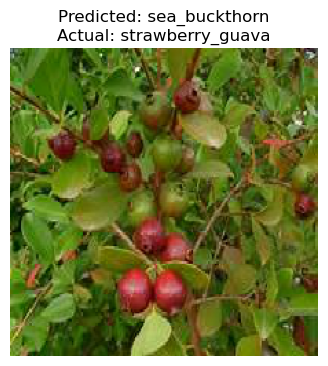

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os, random

MODEL_PATH = r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras" 
DATASET_PATH = r"D:\archive\train"
IMG_SIZE = (224, 224) 

class_names = sorted(os.listdir(DATASET_PATH))
print("✅ Classes detected:", len(class_names))

model = load_model(MODEL_PATH)  
print("✅ Model loaded successfully!")

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    return predicted_class, confidence, img

def test_random_image():
    random_class = random.choice(class_names)
    class_path = os.path.join(DATASET_PATH, random_class)
    random_img = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, random_img)

    predicted_class, confidence, img = predict_image(img_path)

    print(f"\n🖼️ Test Image: {random_img}")
    print(f" Fruit: {random_class}")
    print(f"({confidence*100:.2f}%)")

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_names[predicted_class]}\nActual: {random_class}")
    plt.show()

test_random_image()


In [2]:


import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

MODEL_PATH = r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras"
IMG_SIZE = (160, 160)

try:
    model = load_model(MODEL_PATH)
except Exception as e:
    print("⚠️ Error loading model:", e)
    raise e

print("✅ Model loaded successfully!")

DATASET_PATH = r"D:\archive\train"
class_names = sorted([folder for folder in tf.io.gfile.listdir(DATASET_PATH) if tf.io.gfile.isdir(f"{DATASET_PATH}/{folder}")])
print("✅ Classes detected:", len(class_names))

def predict_image(img_pil):
    # Resize & preprocess
    img = img_pil.resize(IMG_SIZE)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, 0)
    arr = arr / 255.0

    probs = model.predict(arr)[0]
    idx = np.argmax(probs)
    return class_names[idx], float(probs[idx]), img

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def on_upload_change(change):
    if uploader.value:
        clear_output(wait=True)
        file_bytes = next(iter(uploader.value.values()))['content']
        img = Image.open(io.BytesIO(file_bytes)).convert("RGB")
        
        predicted_class, confidence, img_display = predict_image(img)
        
        # Display result
        plt.figure(figsize=(4,4))
        plt.imshow(img_display)
        plt.axis('off')
        plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
        plt.show()
        
        display(uploader)

uploader.observe(on_upload_change, names='value')



✅ Model loaded successfully!
✅ Classes detected: 100


FileUpload(value=(), accept='image/*', description='Upload')

In [ ]:
# Install ipywidgets
!pip install ipywidgets --upgrade


In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import FileUpload
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

MODEL_PATH = r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras"
IMG_SIZE = (160, 160)  
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

DATASET_PATH = r"D:\archive\train"
class_names = sorted(os.listdir(DATASET_PATH))
print("✅ Classes detected:", len(class_names))

upload = FileUpload(accept='image/*', multiple=False)
display(upload)

def predict_uploaded(change):
    if len(upload.value) == 0:
        return
    for name, file_info in upload.value.items():
        content = file_info['content']
        img = Image.open(io.BytesIO(content)).convert("RGB")
       
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Uploaded: {name}")
        plt.show()

        img_resized = img.resize(IMG_SIZE)
        x = image.img_to_array(img_resized)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0
  
        preds = model.predict(x)
        pred_class = class_names[np.argmax(preds[0])]
        confidence = np.max(preds[0])
        
        print(f"🖼️ File: {name}")
        print(f"Predicted Fruit: {pred_class} ({confidence*100:.2f}%)\n")

upload.observe(predict_uploaded, names='value')


✅ Model loaded successfully!
✅ Classes detected: 101


C:\Users\MOHAMMED FEROZ\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


FileUpload(value=(), accept='image/*', description='Upload')

In [2]:

# Fruit Prediction via Image Upload

import io
import numpy as np
from PIL import Image
from IPython.display import display
import ipywidgets as widgets
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

MODEL_PATH = r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras"
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

class_names = model.output_names if hasattr(model, 'output_names') else None
if not class_names:
   
    class_names = ["class1", "class2", "..."]  
print("✅ Classes detected:", len(class_names))


upload = widgets.FileUpload(
    accept='image/*',      
    multiple=False          
)
display(upload)

def predict_uploaded(change):
    if not upload.value:
        return
    
    for name, file_info in upload.value.items():
       
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)  
        

        IMG_SIZE = (160, 160)  
        x = img.resize(IMG_SIZE)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # normalize
        
 
        preds = model.predict(x)
        pred_class = class_names[np.argmax(preds[0])]
        confidence = np.max(preds[0])
        
        # Display results
        print(f"🖼️ File: {name}")
        print(f"Predicted Fruit: {pred_class} ({confidence*100:.2f}%)\n")

upload.observe(predict_uploaded, names='value')


✅ Model loaded successfully!
✅ Classes detected: 1


FileUpload(value=(), accept='image/*', description='Upload')

In [9]:
# -------------------------------
# Fruit Detection - Testing Code
# -------------------------------

import numpy as np
import os
import io
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# -------------------------------
# Load model
# -------------------------------
MODEL_PATH =  r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras"
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

# -------------------------------
# Load class names from dataset
# -------------------------------
DATASET_PATH = r"D:\archive\train"

class_names = sorted(os.listdir(DATASET_PATH))
print("✅ Classes detected:", len(class_names))

# -------------------------------
# Upload widget
# -------------------------------
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)

# -------------------------------
# Prediction function
# -------------------------------
def predict_uploaded(change):
    for name, file_info in upload.value.items():
        # Load image from upload
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)   # Show uploaded image

        # Preprocess
        IMG_SIZE = (224, 224)  # must match training size
        x = img.resize(IMG_SIZE)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # normalize

        # Predict
        preds = model.predict(x)
        class_index = np.argmax(preds[0])   # <-- get index
        pred_class = class_names[class_index]
        confidence = np.max(preds[0])

        # Show results
        display(
            f"📂 File: {name}\n"
            f"🍎 Predicted Fruit: {pred_class}\n"
            f"🔢 Class Index: {class_index}\n"
            f"📊 Confidence: {confidence*100:.2f}%"
        )

# -------------------------------
# Link upload to prediction
# -------------------------------
upload.observe(predict_uploaded, names='value')


✅ Model loaded successfully!
✅ Classes detected: 101


FileUpload(value=(), accept='image/*', description='Upload')

In [16]:

import os, io
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import ipywidgets as widgets
from IPython.display import display


MODEL_PATH =  r"C:\Users\MOHAMMED FEROZ\computer vision\final_fruit_model.keras"
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

DATASET_PATH = r"D:\archive\train"
class_names = sorted(os.listdir(DATASET_PATH))
print("✅ Classes detected:", len(class_names))


IMG_SIZE = (128, 128) 

upload = widgets.FileUpload(accept="image/*", multiple=False)
display(upload)

# -------------------------------
# Prediction function
# -------------------------------
def predict_uploaded(change):
    print("⚡ Function triggered!")

    files = upload.value
    if isinstance(files, dict):   # old behavior
        files = files.items()
    elif isinstance(files, tuple):  # new behavior
        files = [(f["metadata"]["name"], f) for f in files]

    for name, file_info in files:
        # Load & show image
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)

        # Preprocess
        img_resized = img.resize(IMG_SIZE)
        img_array = image.img_to_array(img_resized)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        print(f"🖼️ Uploaded Image: {name}")
        print(f"🍎 Predicted Fruit: {class_names[predicted_class]} ({confidence*100:.2f}%)")

upload.observe(predict_uploaded, names="value")


✅ Model loaded successfully!
✅ Classes detected: 101


FileUpload(value=(), accept='image/*', description='Upload')

In [18]:

import os, io
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

MODEL_PATH = r"C:\\Users\\MOHAMMED FEROZ\\computer vision\\final_fruit_model.keras"  # <-- update path
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

DATASET_PATH = r"D:\archive\train"
class_names = sorted(os.listdir(DATASET_PATH))
print("✅ Classes detected:", len(class_names))

IMG_SIZE = (128, 128)

upload = widgets.FileUpload(accept="image/*", multiple=False)
display(upload)

def predict_uploaded(change):
    print("⚡ Function triggered!")

    files = upload.value


    if isinstance(files, dict):
        files = files.items()

  
    elif isinstance(files, tuple):
        fixed_files = []
        for f in files:
            # Some versions use "metadata", others directly "name"
            fname = f.get("metadata", {}).get("name", f.get("name", "uploaded.png"))
            fixed_files.append((fname, f))
        files = fixed_files

    for name, file_info in files:
        clear_output(wait=True)  # clears previous outputs for fresh result

        # Load & show image
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)

        # Preprocess
        img_resized = img.resize(IMG_SIZE)
        img_array = image.img_to_array(img_resized)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        print(f"🖼️ Uploaded Image: {name}")
        print(f"🍎 Predicted Fruit: {class_names[predicted_class]} ({confidence*100:.2f}%)")

upload.observe(predict_uploaded, names="value")


✅ Model loaded successfully!
✅ Classes detected: 101


FileUpload(value=(), accept='image/*', description='Upload')

In [ ]:

!pip install tensorflow matplotlib pillow scikit-learn ipywidgets --quiet

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import io

DATASET_PATH = r"D:\archive\train"  # change to your folder
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20  # you can increase later

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% val
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)
print(f"✅ Classes detected: {num_classes}")

base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint("fruit_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop]
)

model = load_model("fruit_model.h5")
print("✅ Model loaded successfully!")

def predict_image(img):
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    preds = model.predict(img_array)
    pred_class = class_names[np.argmax(preds[0])]
    confidence = np.max(preds[0])
    return pred_class, confidence

upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)

def on_upload_change(change):
    if len(upload.value) == 0:
        print("❌ No file uploaded")
        return
    
    # Get uploaded file
    for file_name in upload.value:
        content = upload.value[file_name]['content']
        img = Image.open(io.BytesIO(content)).convert('RGB')
        display(img)
        pred_class, confidence = predict_image(img)
        print(f"🖼️ Predicted: {pred_class} ({confidence*100:.2f}%)")

upload.observe(on_upload_change, names='value')
